# IBM Data Science Capstone Project: 
# Predicting the Severity of a Potential Accident
Case Study: Predict the severity of an accident

by Ariella Goldman

## Table of Contents:
1 [Introduction: Business Understanding](#1) <br>
2 [Data Understanding](#2) <br>
&emsp; 2.1 [About the Data](#2.1) <br>
&emsp; 2.2 [Load Data](#2.2) <br>
3 [Data Preparation](#3) <br>
&emsp; 3.1 [Sample the Data](#3.1) <br>
&emsp; 3.2 [Rename and Drop Columns](#3.2) <br>
&emsp; 3.3 [Check for Missing Data](#3.3) <br>
&emsp; 3.4 [Data Exploration and Visualizations](#3.4) <br>
&emsp; 3.5 [Create Features](#3.5) <br>
4 [Modeling](#4) <br>
&emsp; 4.1 [Train Test Split](#4.1) <br>
&emsp; 4.2 [K-Nearest Neighbors](#4.2) <br>
&emsp; 4.3 [Decision Tree](#4.3) <br>
&emsp; 4.4 [Random Forest](#4.4) <br>
&emsp; 4.5 [Support Vector Machine](#4.5) <br>
&emsp; 4.6 [Logistic Regression](#4.6) <br>
5 [Results and Evaluation](#5) <br>
6 [Deployment](#6) <br>
&emsp; 6.1 [Report](#6.1) <br>
7 [Conclusion](#7) <br>


## Introduction: Business Understanding <a class="anchor" id="1"></a>
The initial phase is to understand the project's objective from the business or application perspective. Then, you need to translate this knowledge into a machine learning problem with a preliminary plan to achieve the objectives.

The objective of this project is to predict the severity of an accident. If something could warn you, given maybe the weather and the road conditions, about how severe a potential accident would be, you might drive more carefully or perhaps change your travel plans. 

Audience: Stakeholders of an insurance company. 

Problem: Insurance company is spending too much money of out their spending budget on car repairs (from insurees' car collisions).

Collision insurance is a coverage that helps pay to repair or replace your car if it's damaged in an accident with another vehicle or object, such as a fence or a tree. Car insurance companies are responsible for paying money for car repairs when certain collision requirements are met. It is in the insurance company's best interest that cars do not get damaged or get damaged minimally, so that insurance companies do not need to put up the money for car repairs.

Insurance companies often offer lower insurance premiums to drivers who pass drivers' education courses. Because the companies recognise that educated drivers will cost the company less money overall, they offer incentive to drivers to participate in drivers' education courses. Insurance companies recognize that they benefit from drivers' education.

Predictive analytics concerning the severity of car collisions can also benefit insurance companies. If drivers can get information about the severity of a potential car crash, drivers can make educated decisions. No sane driver wants to get into a crash and cause damage to either himself or his car. The more empowered a driver is about the driving conditions, the less likely it will be for insurance companies to be responsible for covering automobile collisions. 

Modeling car collision severity prediction and improving the model are critical to the effective performance of drivers for improved safety and less damage. In accident severity modeling, the input vectors are the characteristics of the accident, such as road and environment characteristics while the output vector is the corresponding class of accident severity.

Import libraries into notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
%matplotlib inline

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Data Understanding <a class="anchor" id="2"></a>


### About the data <a class="anchor" id="2.1"></a>

This data set is about accident (car collisions) severity. This data includes all types of collisions. The data dates weekly from 2004 to present. The data has been collected from the Seattle Department of Transportation.

The data set contains information about car collisions concerning both external and internal aspects. External factors include weather, road conditions, light conditions, day of week and time of day. Internal factors include collision address type (ie alley, block, intersection), whether a driver was speeding, whether the collision was due to inattention, whether a driver was under the influence of alcohol or drugs. 

This data set contains 194673 rows. There are 37 attributes, some numeric and some categorical. Some attributes have missing data. The data set is labeled with the severity of the accident - "1" or "2" indicating property damage or injury, respectively. My assumption is that severity level 2 "injury" includes property damage. This is not a balanced labeled dataset. Metadata about the dataset can be found at https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf.  

Use KNN/Decision Tree/Random Forest/Logisitc Regression classification algorithms from sklearn to predict the accident severity. Categorical data will be treated with Pandas get_dummies method. Rows with missing values will be dropped.

### Load Data from CSV file <a class="anchor" id="2.2"></a>

In [3]:
df = pd.read_csv('Data-Collisions.csv', dtype={'SEVERITYCODE': object, 'X': float, 'Y': float, 'OBJECTID': 'int64',
                                               'INCKEY': float, 'COLDETKEY': float, 'REPORTNO': object,
                                               'STATUS': object, 'ADDRTYPE': object, 'INTKEY': float,
                                               'LOCATION': object, 'EXCEPTRSNCODE': object, 'EXCEPTRSNDESC': object,
                                               'SEVERITYCODE.1': object, 'SEVERITYDESC': object, 'PERSONCOUNT': float,
                                               'PEDCOUNT': float, 'PEDCYLCOUNT': float, 'VEHCOUNT': float,
                                               'INCDATE': object, 'INCDTTM': object, 'JUNCTIONTYPE': object,
                                               'SDOT_COLCODE': object, 'SDOT_COLDESC': object, 'HITPARKEDCAR': object,
                                               'INATTENTIONIND': object, 'UNDERINFL': object, 'WEATHER': object,
                                               'ROADCOND': object, 'LIGHTCOND': object, 'PEDROWNOTGRNT': object,
                                               'SDOTCOLNUM': object, 'SPEEDING': object, 'ST_COLCODE': object,
                                               'ST_COLDESC': object, 'SEGLANEKEY': float, 'CROSSWALKKEY': float})
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307.0,1307.0,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0.0,0.0,N
1,1,-122.347294,47.647172,2,52200.0,52200.0,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039,NaN,11,From same direction - both going straight - bo...,0.0,0.0,N
2,1,-122.334540,47.607871,3,26700.0,26700.0,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031,NaN,32,One parked--one moving,0.0,0.0,N
3,1,-122.334803,47.604803,4,1144.0,1144.0,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0.0,0.0,N
4,2,-122.306426,47.545739,5,17700.0,17700.0,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032,NaN,10,Entering at angle,0.0,0.0,N


In [4]:
df.shape

(194673, 38)

So our dataset consists of 194,673 rows. Each row represents a collission, and for each collission, there's a ton of other information.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  object 
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  float64
 5   COLDETKEY       194673 non-null  float64
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  object 
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  float64
 17  PEDCOUNT  

In [6]:
df.describe(include="all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,114936,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,2,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,114932,1,63,62,NaN,NaN,2
top,1,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,...,Dry,Daylight,Y,4116048,Y,32,One parked--one moving,NaN,NaN,N
freq,136485,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,2,9333,44421,44421,NaN,NaN,187457
mean,NaN,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,NaN,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,NaN,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,NaN,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,NaN,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,NaN,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


## Data Preparation <a class="anchor" id="3"></a>

The data preparation includes all the required activities to construct the final dataset which will be fed into the modeling tools. Data preparation can be performed multiple times and it includes balancing the labeled data, transformation, filling missing data, and cleaning the dataset.

### Sample the data <a class="anchor" id="3.1"></a>
by reducing rows labeled as 1

In [90]:
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [91]:
df["SEVERITYCODE"].value_counts(normalize=True) * 100

1    70.109877
2    29.890123
Name: SEVERITYCODE, dtype: float64

Again, this dataset is unbalanced. There are 136,485 rows labeled as Severity = 1 ("property damage") and 58,188 rows labeled as Severity = 2 ("injury"). Levels 1 and 2 repersent categorical information but level 2 ("injury") is in fact more severe than level 1 ("property damage").

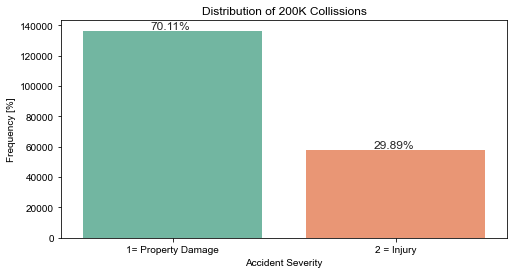

In [8]:
ax = sns.countplot(x = df['SEVERITYCODE'] ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df['SEVERITYCODE'])), (p.get_x()+ 0.3, p.get_height()+1000))

plt.title('Distribution of 200K Collissions',)
plt.xlabel('Accident Severity')
plt.ylabel('Frequency [%]')
plt.xticks(np.arange(2), ['1= Property Damage', '2 = Injury'])
plt.show()

In order to achieve a balanced data set, downsample the majority class so that the entire data set will be equally distributed among the two labels

In [187]:
# Separate majority and minority classes
df_majority = df[df.SEVERITYCODE == '1']
df_minority = df[df.SEVERITYCODE == '2']


# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=58188,     # to match minority class
                                 random_state=123)

# Combine minority class with downsampled majority class
balanced_df = pd.concat([df_majority_downsampled, df_minority])
df2 = balanced_df
print(df2.shape)

(116376, 38)


In [188]:
# Display new class counts
df2['SEVERITYCODE'] = df2['SEVERITYCODE'].astype(int) #covert object to ints
df2["SEVERITYCODE"].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

Show the updated balance.

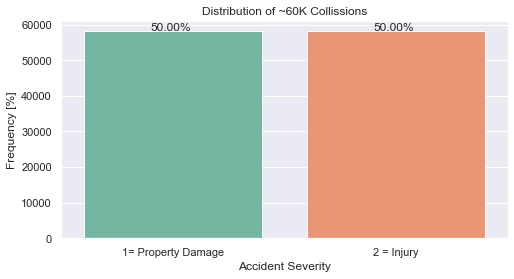

In [189]:
ax = sns.countplot(x = df2['SEVERITYCODE'] ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df2['SEVERITYCODE'])), (p.get_x()+ 0.3, p.get_height()+250))

plt.title('Distribution of ~60K Collissions',)
plt.xlabel('Accident Severity')
plt.ylabel('Frequency [%]')
plt.xticks(np.arange(2), ['1= Property Damage', '2 = Injury'])
plt.show()

Plot the car collisions by location, mark by severity code to see if there's a pattern.

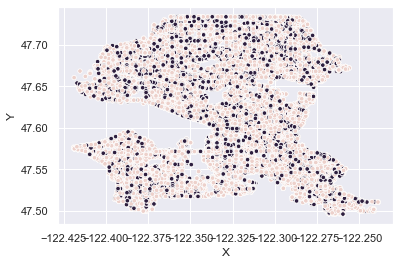

In [190]:
# Map of accidents, color code by SEVERITY level
sns.scatterplot(x='X', y='Y', data=df, hue='SEVERITYCODE', legend=False, s=20)
plt.show()

### Rename and drop columns <a class="anchor" id="3.2"></a>

Rename for ease of readability, drop unhelpful columns

In [191]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

List the updated column names.

In [192]:
df2.columns = ['Severity_Code', 'X', 'Y', 'Object_ID', 'Inc_Key', 'Coldet_Key', 'Report_No',
               'Status', 'Addr_Type', 'Int_Key', 'Location', 'Exceptrsn_Code',
               'Exceptrsn_Desc', 'Severity_Code.1', 'Severity_Desc', 'Collision_Type',
               'Person_Count', 'Ped_Count', 'Ped_Cyl_Count', 'Veh_Count', 'Inc_Date',
               'Inc_Dttm', 'Junction_Type', 'SDOT_Col_Code', 'SDOT_Col_Desc',
               'Inattention_Ind', 'Under_Infl', 'Weather', 'Road_Cond', 'Light_Cond',
               'Ped_ROW_Not_Grnt', 'SDOT_Col_Num', 'Speeding', 'ST_Col_Code', 'ST_Col_Desc',
               'Seg_Lane_Key', 'Crosswalk_Key', 'Hit_Parked_Car']


Drop columns that are unlikely (according to personal intuition) to help towards ML model accuracy, for ease of use

In [193]:
df2 = df2.drop('X', axis=1) 
df2 = df2.drop('Y', axis=1) 
df2 = df2.drop('Object_ID', axis=1) 
df2 = df2.drop('Int_Key', axis=1) #values are all under 500
df2 = df2.drop('Inc_Key', axis=1)  
df2 = df2.drop('Coldet_Key', axis=1)  
df2 = df2.drop('Report_No', axis=1)  
df2 = df2.drop('Status', axis=1)  #Metadata form doesn't describe what this attribute means. Values are either "Matched" or "Unmatched" but I don't know what that means
df2 = df2.drop('Exceptrsn_Desc', axis=1) #no useful information
df2 = df2.drop('Exceptrsn_Code', axis=1) #same information in Exceptrsn_Desc
df2 = df2.drop('Severity_Desc', axis=1) #corresponds exactly with Severity label
df2 = df2.drop('SDOT_Col_Code', axis=1)
df2 = df2.drop('SDOT_Col_Num', axis=1) #not useful information
df2 = df2.drop('ST_Col_Desc', axis=1) #corresponds exactly with ST_Col_Code
df2 = df2.drop('Seg_Lane_Key', axis=1) #not useful information
df2 = df2.drop('Crosswalk_Key', axis=1) #not useful information

### Check for missing values  <a class="anchor" id="3.3"></a>

In [194]:
#Missing values for each column
null_count = df2.isnull().sum()
null_count[null_count>0]#.plot('bar', figsize=(30,10))

Addr_Type              922
Location              1305
Collision_Type        2710
Junction_Type         2937
Inattention_Ind      97717
Under_Infl            2693
Weather               2816
Road_Cond             2764
Light_Cond            2848
Ped_ROW_Not_Grnt    111981
Speeding            110396
ST_Col_Code             15
dtype: int64

### Data Exploration and Visualizations <a class="anchor" id="3.4"></a>

In [195]:
df2.describe()

,Severity_Code,Person_Count,Ped_Count,Ped_Cyl_Count,Veh_Count
count,116376.000000,116376.000000,116376.000000,116376.000000,116376.000000
mean,1.500000,2.523854,0.058672,0.043987,1.904929
std,0.500002,1.419223,0.246886,0.206860,0.665389
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,2.000000
50%,1.500000,2.000000,0.000000,0.000000,2.000000
75%,2.000000,3.000000,0.000000,0.000000,2.000000
max,2.000000,81.000000,6.000000,2.000000,11.000000


Let's make Severity_Code "property damage" = 0 (instead of 1) and "injury" = 1 (instead of 2)

In [196]:
df2['Severity_Code'].replace(1, 0, inplace=True)
df2['Severity_Code'].replace(2, 1, inplace=True)
df2['Severity_Code'].value_counts() #no nulls

1    58188
0    58188
Name: Severity_Code, dtype: int64

Explore other attributes. Check nulls and value counts. Clean some attributes up.

In [197]:
df2['Ped_Count'].isna().sum() #0 null
df2['Ped_Count'].value_counts() #will need to group somehow
df2['Ped_Inv'] = df2['Ped_Count'].apply(lambda x: 1 if (x>=1)  else 0) #group together everything above 1 (including 1)
df2 = df2.drop('Ped_Count', axis=1)
df2['Ped_Inv'].value_counts()

0    109831
1      6545
Name: Ped_Inv, dtype: int64

In [155]:
df2['Ped_Cyl_Count'].isna().sum() #0
df2['Ped_Cyl_Count'] = df2['Ped_Cyl_Count'].astype(int) #covert floats to ints
df2['Ped_Cyl_Count'].value_counts()

0    111300
1      5033
2        43
Name: Ped_Cyl_Count, dtype: int64

In [156]:
df2['Person_Count'].isna().sum() #0 null
df2['Person_Count'].value_counts() #group together everything above 5
df2['Person_Count'].replace([x for x in np.arange(5.0, 82.0)], 5.0, inplace=True)
df2['Person_Count'] = df2['Person_Count'].astype(int) #convert floats to ints
df2['Person_Count'].value_counts() 

2    64659
3    22848
4     9936
5     8107
1     7487
0     3339
Name: Person_Count, dtype: int64

We can see property more collisions with 1-2 people involve result in property damage, whereas collissions with 3+ people involves result more often in injury. 

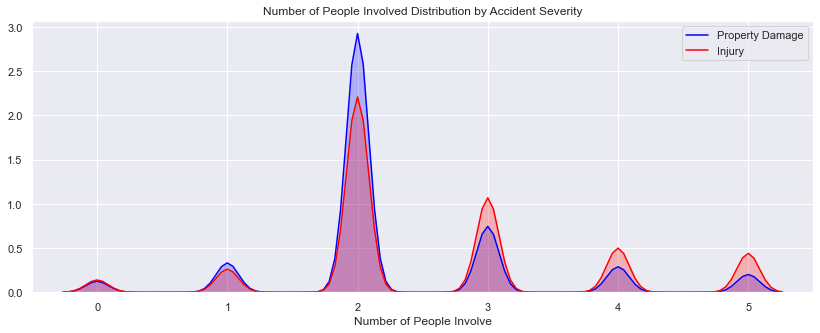

In [157]:
plt.figure(figsize=(14,5))
acc_slight = df2['Severity_Code'] == 0
acc_severe = df2['Severity_Code'] == 1

sns.kdeplot(df2['Person_Count'][acc_slight],shade=True,color='Blue', label='Property Damage').set_xlim(-.5,5.5)
sns.kdeplot(df2['Person_Count'][acc_severe],shade=True,color='Red', label='Injury').set_xlim(-.5,5.5)

plt.title('Number of People Involved Distribution by Accident Severity')
plt.xlabel('Number of People Involve')
plt.show()

In [158]:
df2['Veh_Count'].isna().sum() #0 null
df2['Veh_Count'].value_counts() #group together everything above 3
df2['Veh_Count'] = df2['Veh_Count'].apply(lambda x: 3 if (x>=3)  else 2 if x==2 else 1 if x==1 else 0)
#df2['Veh_Count'].replace([x for x in np.arange(3.0, 15.0)], 3.0, inplace=True)
df2['Veh_Count'] = df2['Veh_Count'].astype(int) #covert floats to ints
df2['Veh_Count'].value_counts()

2    83522
1    19068
3    10893
0     2893
Name: Veh_Count, dtype: int64

Plot the adjusted distribution of vehicles involved in the collision

/Users/ariella/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Min: 0 
Max: 3 
Median: 2.0


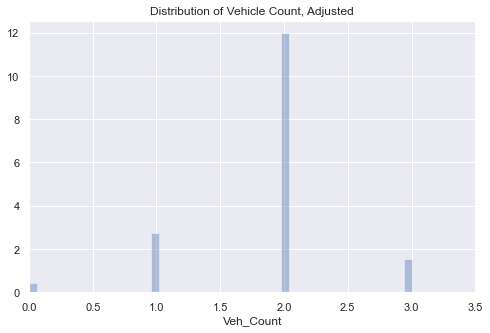

In [159]:
plt.figure(figsize=(8,5))
plt.title("Distribution of Vehicle Count, Adjusted")
sns.distplot(df2['Veh_Count']).set_xlim(0,3.5)
print('Min:',    df2['Veh_Count'].min(), '\n'
      'Max:',    df2['Veh_Count'].max(), '\n'
      'Median:', df2['Veh_Count'].median())

In [160]:
df2 = df2.drop('Severity_Code.1', axis=1)  

Create new columns for year, month, day, day of week, time, and hour

In [161]:
#df2['Inc_Date'] = pd.to_datetime(df2['Inc_Date']).dt.date #all columns have 00:00:00 for time
df2 = df2.drop('Inc_Date', axis=1)  
df2['Inc_DT'] = pd.to_datetime(df2['Inc_Dttm'])
df2 = df2.drop('Inc_Dttm', axis=1)

In [162]:
df2['Inc_DayOfWeek'] = df2['Inc_DT'].dt.dayofweek 
df2['Inc_Time'] = df2['Inc_DT'].dt.time
df2['Inc_Year'] = df2['Inc_DT'].dt.year
df2['Inc_Month'] = df2['Inc_DT'].dt.strftime('%b')
df2['Inc_Day'] = df2['Inc_DT'].dt.day
df2['Inc_Hour'] = df2['Inc_DT'].dt.hour
df2[['Inc_DT', 'Inc_DayOfWeek', 'Inc_Time', 'Inc_Year', 'Inc_Month', 'Inc_Day','Inc_Hour']].head()

,Inc_DT,Inc_DayOfWeek,Inc_Time,Inc_Year,Inc_Month,Inc_Day,Inc_Hour
25055,2005-01-22 20:30:00,5,20:30:00,2005,Jan,22,20
65280,2008-08-22 10:45:00,4,10:45:00,2008,Aug,22,10
86292,2010-11-19 07:25:00,4,07:25:00,2010,Nov,19,7
155111,2016-06-17 09:17:00,4,09:17:00,2016,Jun,17,9
64598,2008-03-09 00:00:00,6,00:00:00,2008,Mar,9,0


Plot the distribution of collisions over time of day

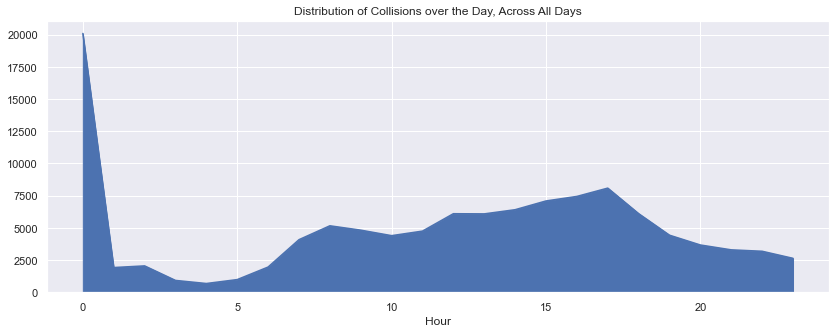

In [163]:
time_x = pd.to_datetime(df2['Inc_Time'], format='%H:%M:%S').dt.hour
plt.figure(figsize=(14,5))
plt.title("Distribution of Collisions over the Day, Across All Days")
plt.xlabel("Hour")
time_x.value_counts().sort_index().plot(kind='area')

In [164]:
df2['Addr_Type'].isna().sum() #1926 null
df2["Addr_Type"].value_counts() #will probably need to convert this to numeric and normalize/standardize

Block           71321
Intersection    43750
Alley             383
Name: Addr_Type, dtype: int64

In [165]:
df2['Location'].isna().sum() #2677 null
df2['Location'].value_counts() #probably drop this column because the counts are low

BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    177
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    177
6TH AVE AND JAMES ST                                              171
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          168
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                    159
                                                                 ... 
LINDEN AVE N AND N 76TH ST                                          1
BARTLETT AVE NE BETWEEN DEAD END AND NE 107TH ST                    1
30TH AVE SW BETWEEN SW HENDERSON ST AND SW BARTON ST                1
10TH AVE E AND E ROY W ST                                           1
26TH AVE NE AND NE 115TH ST                                         1
Name: Location, Length: 19857, dtype: int64

In [166]:
df2['Collision_Type'].isna().sum() #4902 null
df2['Collision_Type'].value_counts() #will probably need to convert this to numeric and normalize/standardize

Rear Ended    22904
Angles        22558
Parked Car    21969
Other         13668
Sideswipe      9403
Left Turn      8937
Pedestrian     6229
Cycles         5009
Right Turn     1608
Head On        1381
Name: Collision_Type, dtype: int64

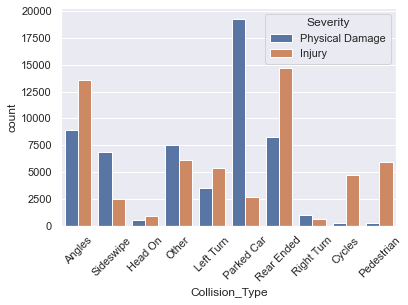

In [176]:
g = sns.countplot(data=df2,x='Collision_Type',hue='Severity_Code')
plt.legend(title='Severity', loc='upper right', labels=['Physical Damage', 'Injury'])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show(g)

In [167]:
df2['Junction_Type'].isna().sum() #6329 null
df2['Junction_Type'].value_counts() #will probably need to convert this to numeric and normalize/standardize, drop less than 500?

Mid-Block (not related to intersection)              49349
At Intersection (intersection related)               42397
Mid-Block (but intersection related)                 13926
Driveway Junction                                     6402
At Intersection (but not related to intersection)     1268
Ramp Junction                                           94
Unknown                                                  3
Name: Junction_Type, dtype: int64

In [168]:
df2['Inattention_Ind'].value_counts() #fill blanks with no
df2['Inattention_Ind'].fillna("N", inplace=True)
df2['Inattention_Ind'].replace('N', 0, inplace=True)
df2['Inattention_Ind'].replace('Y', 1, inplace=True)
df2['Inattention_Ind'].value_counts() # normalize/standardize?

0    97717
1    18659
Name: Inattention_Ind, dtype: int64

In [169]:
df2['Under_Infl'].isna().sum() #4884 null
df2['Under_Infl'].value_counts() #replace 0 w and 1 with Yes)
df2['Under_Infl'].fillna(0, inplace=True)
df2['Under_Infl'].replace(['N','0'], 0, inplace=True)
df2['Under_Infl'].replace(['Y','1'], 1, inplace=True)
df2['Under_Infl'].value_counts()

0    110388
1      5988
Name: Under_Infl, dtype: int64

In [170]:
df2['Weather'].isna().sum() #5081 null
df2['Weather'].value_counts() #will i need to group this or just drop everything with fewer than 500?

Clear                       67946
Raining                     20584
Overcast                    16834
Unknown                      6851
Snowing                       474
Other                         406
Fog/Smog/Smoke                355
Sleet/Hail/Freezing Rain       63
Blowing Sand/Dirt              30
Severe Crosswind               13
Partly Cloudy                   4
Name: Weather, dtype: int64

In [171]:
df2['Road_Cond'].isna().sum() #5012 null
df2['Road_Cond'].value_counts() #will i need to group this or just drop everything with fewer than 500?

Dry               76000
Wet               29374
Unknown            6806
Ice                 678
Snow/Slush          528
Other                83
Standing Water       57
Sand/Mud/Dirt        47
Oil                  39
Name: Road_Cond, dtype: int64

In [172]:
df2.groupby(['Light_Cond'])['Severity_Code'].value_counts(normalize=True)

Light_Cond                Severity_Code
Dark - No Street Lights   0                0.614319
                          1                0.385681
Dark - Street Lights Off  0                0.550498
                          1                0.449502
Dark - Street Lights On   0                0.503141
                          1                0.496859
Dark - Unknown Lighting   1                0.571429
                          0                0.428571
Dawn                      1                0.536808
                          0                0.463192
Daylight                  1                0.539054
                          0                0.460946
Dusk                      1                0.541203
                          0                0.458797
Other                     0                0.590551
                          1                0.409449
Unknown                   0                0.900198
                          1                0.099802
Name: Severity_Code, dty

In [38]:
df2['Light_Cond'].isna().sum() #5170 null
df2['Light_Cond'].replace(['Dark - Street Lights On', 'Dark - No Street Lights', 
                           'Dark - Street Lights Off', 'Dark - Unknown Lighting'], "Dark", inplace=True)
df2['Light_Cond'].value_counts() #drop everything with fewer than 500?

Daylight    71503
Dark        30709
Unknown      6062
Dusk         3592
Dawn         1535
Other         127
Name: Light_Cond, dtype: int64

In [39]:
df2['Ped_ROW_Not_Grnt'].value_counts()
df2['Ped_ROW_Not_Grnt'].fillna("N", inplace=True)
df2['Ped_ROW_Not_Grnt'].replace(['N'], 0, inplace=True)
df2['Ped_ROW_Not_Grnt'].replace(['Y'], 1, inplace=True)
df2['Ped_ROW_Not_Grnt'].value_counts() # normalize/standardize?

0    111981
1      4395
Name: Ped_ROW_Not_Grnt, dtype: int64

In [40]:
df2['Speeding'].value_counts()
df2['Speeding'].fillna("N", inplace=True)
df2['Speeding'].replace(['N'], 0, inplace=True)
df2['Speeding'].replace(['Y'], 1, inplace=True)
df2['Speeding'].value_counts() # normalize/standardize?

0    110396
1      5980
Name: Speeding, dtype: int64

In [41]:
df2['ST_Col_Code'].isna().sum() #18 null
df2['ST_Col_Code'].value_counts() #description in df['ST_COLDESC'] #drop fewer than 500? normalize?

10    22558
32    20161
14    17452
50     7680
28     7044
      ...  
18        3
87        2
49        1
43        1
85        1
Name: ST_Col_Code, Length: 62, dtype: int64

In [42]:
df2['Hit_Parked_Car'].isna().sum() #0 null
df2['Hit_Parked_Car'].replace(['N'], 0, inplace=True)
df2['Hit_Parked_Car'].replace(['Y'], 1, inplace=True)
df2['Hit_Parked_Car'].value_counts() # normalize/standardize?

0    112968
1      3408
Name: Hit_Parked_Car, dtype: int64

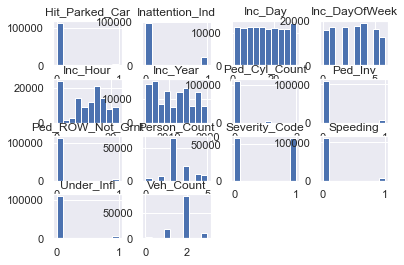

In [43]:
df2.hist()
plt.show()

In [44]:
df2.shape

(116376, 26)

In [45]:
df2.describe(include="all")

,Severity_Code,Addr_Type,Location,Collision_Type,Person_Count,Ped_Cyl_Count,Veh_Count,Junction_Type,SDOT_Col_Desc,Inattention_Ind,...,ST_Col_Code,Hit_Parked_Car,Ped_Inv,Inc_DT,Inc_DayOfWeek,Inc_Time,Inc_Year,Inc_Month,Inc_Day,Inc_Hour
count,116376.000000,115454,115071,113666,116376.000000,116376.000000,116376.000000,113439,116376,116376.000000,...,116361,116376.000000,116376.000000,116376,116376.000000,116376,116376.000000,116376,116376.000000,116376.000000
unique,NaN,3,19857,10,NaN,NaN,NaN,7,39,NaN,...,62,NaN,NaN,99107,NaN,1440,NaN,12,NaN,NaN
top,NaN,Block,BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ...,Rear Ended,NaN,NaN,NaN,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,...,10,NaN,NaN,2006-11-02 00:00:00,NaN,00:00:00,NaN,Oct,NaN,NaN
freq,NaN,71321,177,22904,NaN,NaN,NaN,49349,50321,NaN,...,22558,NaN,NaN,66,NaN,17944,NaN,10729,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2004-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2020-05-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.500000,NaN,NaN,NaN,2.454355,0.043987,1.880035,NaN,NaN,0.160334,...,NaN,0.029284,0.056240,NaN,2.920542,NaN,2011.180209,NaN,15.586865,11.258369
std,0.500002,NaN,NaN,NaN,1.066524,0.206860,0.585233,NaN,NaN,0.366917,...,NaN,0.168603,0.230386,NaN,1.917800,NaN,4.697236,NaN,8.793692,7.027652
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,NaN,0.000000,NaN,2004.000000,NaN,1.000000,0.000000
25%,0.000000,NaN,NaN,NaN,2.000000,0.000000,2.000000,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,NaN,1.000000,NaN,2007.000000,NaN,8.000000,7.000000


In [46]:
df2.head()

,Severity_Code,Addr_Type,Location,Collision_Type,Person_Count,Ped_Cyl_Count,Veh_Count,Junction_Type,SDOT_Col_Desc,Inattention_Ind,...,ST_Col_Code,Hit_Parked_Car,Ped_Inv,Inc_DT,Inc_DayOfWeek,Inc_Time,Inc_Year,Inc_Month,Inc_Day,Inc_Hour
25055,0,Intersection,33RD AVE NE AND NE 125TH ST,Angles,2,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,...,10,0,0,2005-01-22 20:30:00,5,20:30:00,2005,Jan,22,20
65280,0,Intersection,8TH AVE AND SPRING ST,Angles,2,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,...,10,0,0,2008-08-22 10:45:00,4,10:45:00,2008,Aug,22,10
86292,0,Intersection,LAKE CITY WAY NE AND NE 145TH ST,Angles,2,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,...,10,0,0,2010-11-19 07:25:00,4,07:25:00,2010,Nov,19,7
155111,0,Block,ALASKAN WY VI NB BETWEEN SENECA ST OFF RP AND ...,Sideswipe,2,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,...,11,0,0,2016-06-17 09:17:00,4,09:17:00,2016,Jun,17,9
64598,0,Block,ROY ST BETWEEN 9TH AVE N AND VALLEY ST,Head On,3,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,...,30,0,0,2008-03-09 00:00:00,6,00:00:00,2008,Mar,9,0


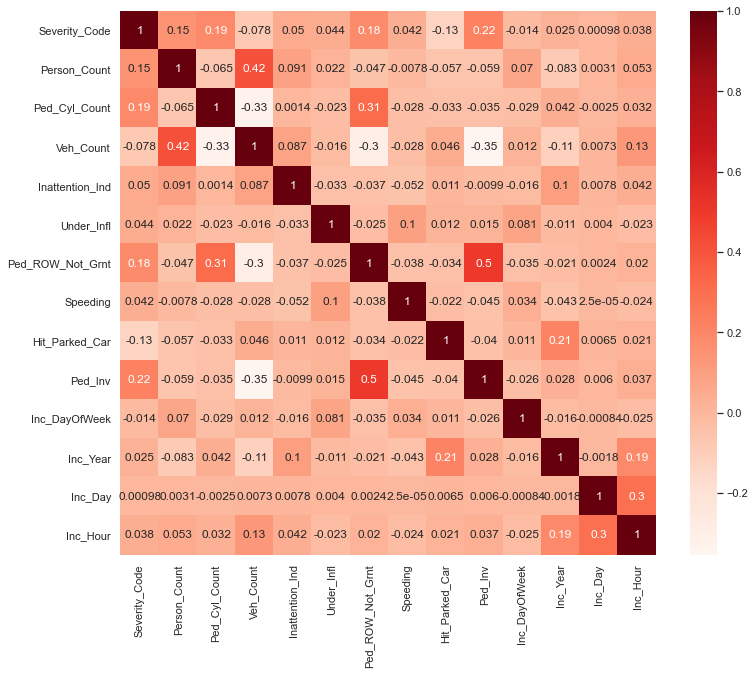

In [47]:
plt.figure(figsize=(12,10))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [48]:
df2.groupby(['Weather'])['Severity_Code'].value_counts(normalize=True)

Weather                   Severity_Code
Blowing Sand/Dirt         0                0.500000
                          1                0.500000
Clear                     1                0.527478
                          0                0.472522
Fog/Smog/Smoke            1                0.526761
                          0                0.473239
Other                     0                0.714286
                          1                0.285714
Overcast                  1                0.519484
                          0                0.480516
Partly Cloudy             1                0.750000
                          0                0.250000
Raining                   1                0.542946
                          0                0.457054
Severe Crosswind          1                0.538462
                          0                0.461538
Sleet/Hail/Freezing Rain  0                0.555556
                          1                0.444444
Snowing                 

In [49]:
df2.groupby(['Road_Cond'])['Severity_Code'].value_counts(normalize=True)

Road_Cond       Severity_Code
Dry             1                0.527158
                0                0.472842
Ice             0                0.597345
                1                0.402655
Oil             1                0.615385
                0                0.384615
Other           1                0.518072
                0                0.481928
Sand/Mud/Dirt   0                0.510638
                1                0.489362
Snow/Slush      0                0.683712
                1                0.316288
Standing Water  1                0.526316
                0                0.473684
Unknown         0                0.889950
                1                0.110050
Wet             1                0.536359
                0                0.463641
Name: Severity_Code, dtype: float64

In [50]:
df2.groupby(['Light_Cond'])['Severity_Code'].value_counts(normalize=True)

Light_Cond  Severity_Code
Dark        0                0.507343
            1                0.492657
Dawn        1                0.536808
            0                0.463192
Daylight    1                0.539054
            0                0.460946
Dusk        1                0.541203
            0                0.458797
Other       0                0.590551
            1                0.409449
Unknown     0                0.900198
            1                0.099802
Name: Severity_Code, dtype: float64

In [51]:
missing_data = df2[['Weather', 'Road_Cond', 'Light_Cond']].isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Weather
False    113560
True       2816
Name: Weather, dtype: int64

Road_Cond
False    113612
True       2764
Name: Road_Cond, dtype: int64

Light_Cond
False    113528
True       2848
Name: Light_Cond, dtype: int64



### Create Features <a class="anchor" id="3.5"></a>

After analyzing the data set, I have decided to focus on these features: weather conditions, road conditions, and light conditions, with severity level as the target label.

In [105]:
# Set the list of features to include in Machine Learning
#feature_list=['Addr_Type', 'Location', 'Collision_Type', 'Person_Count', 'Ped_Cyl_Count', 'Veh_Count', 
#              'Junction_Type', 'SDOT_Col_Desc', 'Inattention_Ind', 'Under_Infl', 'Weather', 'Road_Cond', 
#              'Light_Cond', 'Ped_ROW_Not_Grnt', 'Speeding', 'ST_Col_Code', 'Hit_Parked_Car', 'Ped_Inv', 
#              'Inc_DT', 'Inc_DayOfWeek', 'Inc_Time', 'Inc_Year', 'Inc_Month', 'Inc_Day', 'Inc_Hour']
feature_list=['Severity_Code', 'Weather', 'Road_Cond', 'Light_Cond']
Features=df2[feature_list].copy()
Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116376 entries, 25055 to 194671
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Severity_Code  116376 non-null  int64 
 1   Weather        113560 non-null  object
 2   Road_Cond      113612 non-null  object
 3   Light_Cond     113528 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.4+ MB


Plot distribution of Weather by Severity

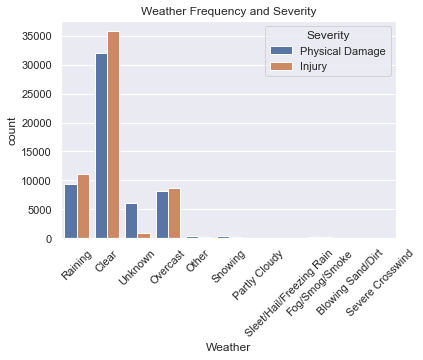

In [177]:
#Features.hist(by='Severity_Code', column='Weather')
g = sns.countplot(data=Features,x='Weather',hue='Severity_Code')
plt.legend(title='Severity', loc='upper right', labels=['Physical Damage', 'Injury'])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title("Weather Frequency and Severity")
plt.show(g)

Plot distribution of Road Conditions by Severity

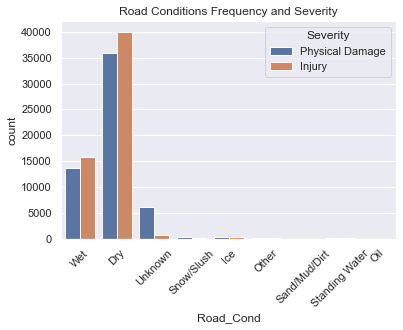

In [185]:
g = sns.countplot(data=Features,x='Road_Cond',hue='Severity_Code')
plt.legend(title='Severity', loc='upper right', labels=['Physical Damage', 'Injury'])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title("Road Conditions Frequency and Severity")
plt.show(g)

Plot distribution of Light Conditions by Severity

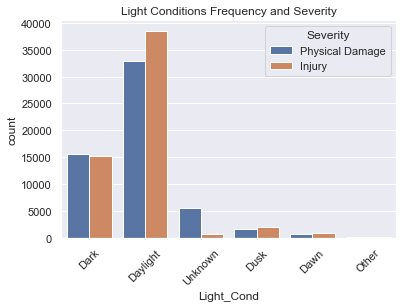

In [184]:
g = sns.countplot(data=Features,x='Light_Cond',hue='Severity_Code')
plt.legend(title='Severity', loc='upper right', labels=['Physical Damage', 'Injury'])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title("Light Conditions Frequency and Severity")
plt.show(g)

In [53]:
# Check missing values
Features.isnull().mean()

Severity_Code    0.000000
Weather          0.024197
Road_Cond        0.023751
Light_Cond       0.024472
dtype: float64

In [92]:
# drop all rows with any missing values
Features.dropna(subset=Features.columns[Features.isnull().mean()!=0], how='any', axis=0, inplace=True)
Features.shape

(113430, 27)

In [55]:
Features = pd.concat([Features,pd.get_dummies(Features['Weather'])], axis=1)
Features = Features.drop('Weather', axis=1)  
Features.head()

,Severity_Code,Road_Cond,Light_Cond,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
25055,0,Wet,Dark,0,0,0,0,0,0,1,0,0,0,0
65280,0,Dry,Daylight,0,1,0,0,0,0,0,0,0,0,0
86292,0,Unknown,Unknown,0,0,0,0,0,0,0,0,0,0,1
155111,0,Dry,Daylight,0,1,0,0,0,0,0,0,0,0,0
64598,0,Dry,Daylight,0,1,0,0,0,0,0,0,0,0,0


In [56]:
Features.sum(axis=0)

Severity_Code                                                           57052
Road_Cond                   WetDryUnknownDryDryDryDryDryDryUnknownDryDryDr...
Light_Cond                  DarkDaylightUnknownDaylightDaylightDaylightDay...
Blowing Sand/Dirt                                                          30
Clear                                                                   67879
Fog/Smog/Smoke                                                            355
Other                                                                     400
Overcast                                                                16822
Partly Cloudy                                                               4
Raining                                                                 20566
Severe Crosswind                                                           13
Sleet/Hail/Freezing Rain                                                   63
Snowing                                                         

In [57]:
#Features = Features.drop('Unknown', axis=1)
#Features = Features.drop('Blowing Sand/Dirt', axis=1)  
#Features = Features.drop('Partly Cloudy', axis=1)  
#Features = Features.drop('Severe Crosswind', axis=1)  
#Features = Features.drop('Sleet/Hail/Freezing Rain', axis=1)  
#Features = Features.drop('Fog/Smog/Smoke', axis=1)  
#Features = Features.drop('Other', axis=1)

In [58]:
Features = pd.concat([Features,pd.get_dummies(Features['Light_Cond'])], axis=1)
Features = Features.drop('Light_Cond', axis=1)  
Features.head()

,Severity_Code,Road_Cond,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown,Dark,Dawn,Daylight,Dusk,Other,Unknown
25055,0,Wet,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
65280,0,Dry,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
86292,0,Unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
155111,0,Dry,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
64598,0,Dry,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [59]:
#Features.sum(axis=0)

In [60]:
#Features = Features.drop('Unknown', axis=1)
#Features = Features.drop('Other', axis=1)
Features.head()

,Severity_Code,Road_Cond,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown,Dark,Dawn,Daylight,Dusk,Other,Unknown
25055,0,Wet,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
65280,0,Dry,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
86292,0,Unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
155111,0,Dry,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
64598,0,Dry,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [61]:
Features = pd.concat([Features,pd.get_dummies(Features['Road_Cond'])], axis=1)
Features = Features.drop('Road_Cond', axis=1)  
Features.head()

,Severity_Code,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,...,Unknown,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
25055,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
65280,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
86292,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
155111,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
64598,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [62]:
#Features.sum(axis=0)

In [63]:
#Features = Features.drop('Unknown', axis=1)
#Features = Features.drop('Oil', axis=1)
#Features = Features.drop('Other', axis=1)
#Features = Features.drop('Sand/Mud/Dirt', axis=1)
#Features = Features.drop('Standing Water', axis=1)
Features.head()

,Severity_Code,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,...,Unknown,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
25055,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
65280,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
86292,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
155111,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
64598,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Save the features.

In [65]:
y = Features['Severity_Code'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [66]:
X = Features.drop('Severity_Code', axis=1)
X[0:5]

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,...,Unknown,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
25055,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
65280,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
86292,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
155111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
64598,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


The data set is labeled with the severity of the accident - "1" or "2" indicating property damage or injury, respectively.

### Normalize Data

Data Standardization give data zero mean and unit variance.

In [67]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.016265  , -1.22072759, -0.05603132, -0.05948852, -0.41728451,
        -0.00593846,  2.1249503 , -0.01070613, -0.02357366, -0.06450399,
        -0.25308364,  1.64297514, -0.1171248 , -1.3050764 , -0.18065685,
        -0.03347967, -0.23740606, -1.42153871, -0.07742966, -0.01854569,
        -0.02706039, -0.02035987, -0.06825559, -0.02242243, -0.25221484,
         1.69302   ],
       [-0.016265  ,  0.81918358, -0.05603132, -0.05948852, -0.41728451,
        -0.00593846, -0.47059924, -0.01070613, -0.02357366, -0.06450399,
        -0.25308364, -0.60865194, -0.1171248 ,  0.76623866, -0.18065685,
        -0.03347967, -0.23740606,  0.70346308, -0.07742966, -0.01854569,
        -0.02706039, -0.02035987, -0.06825559, -0.02242243, -0.25221484,
        -0.59066048],
       [-0.016265  , -1.22072759, -0.05603132, -0.05948852, -0.41728451,
        -0.00593846, -0.47059924, -0.01070613, -0.02357366, -0.06450399,
         3.95126284, -0.60865194, -0.1171248 , -1.3050764 , -0.18065685,
       

## Modeling <a class="anchor" id="4"></a>

In this phase, various algorithms and methods can be selected and applied to build the model including supervised machine learning techniques. You can select SVM, XGBoost, decision tree, or any other techniques. You can select a single or multiple machine learning models for the same data mining problem. At this phase, stepping back to the data preparation phase is often required.

### Train Test Split <a class="anchor" id="4.1"></a>

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90744, 26) (90744,)
Test set: (22686, 26) (22686,)


### K Nearest Neighbor (KNN) <a class="anchor" id="4.2"></a>

KNN will help predict the severity code of an outcome by finding the most similar to data point within k distance.

In [69]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []
for n in range(3,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.        , 0.        , 0.54623997, 0.53649828, 0.54610773,
       0.54055365, 0.54315437, 0.54050957, 0.55483558, 0.55470334,
       0.55443886, 0.5519263 , 0.55505598, 0.55179406, 0.55554086,
       0.55483558, 0.55448294, 0.55430662, 0.55518822])

Plot model accuracy for different number of Neighbors.

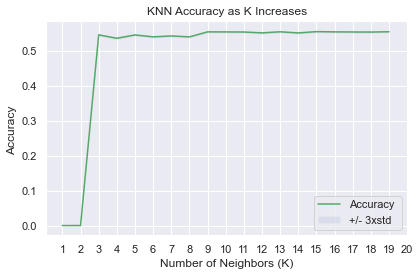

In [70]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.xticks(range(1,21))
plt.title('KNN Accuracy as K Increases')
plt.tight_layout()
plt.show()

In [71]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy was with 0.5555408622057657 with k = 15


In [72]:
kNN_model = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train,y_train)

In [73]:
print('Classification Report:\n',classification_report(y_test, yhat))

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.36      0.45     11259
           1       0.54      0.74      0.63     11427

    accuracy                           0.56     22686
   macro avg       0.56      0.55      0.54     22686
weighted avg       0.56      0.56      0.54     22686



### Decision Tree <a class="anchor" id="4.3"></a>

A decision tree supplies a layout of all possible outcomes in order to analyze the concequences of a decision. It context, the decision tree observes all possible outcomes of different weather conditions.

In [74]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [75]:
yhat = DT_model.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [76]:
print('Classification Report:\n',classification_report(y_test, yhat))

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.33      0.43     11259
           1       0.54      0.78      0.64     11427

    accuracy                           0.56     22686
   macro avg       0.57      0.56      0.54     22686
weighted avg       0.57      0.56      0.54     22686



### Random Forest <a class="anchor" id="4.4"></a>

In [77]:
RF_Model = RandomForestClassifier(n_estimators=100)
RF_Model.fit(X_train,y_train) #train the model

RandomForestClassifier()

In [78]:
yhat = RF_Model.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [79]:
print('Classification Report:\n',classification_report(y_test, yhat))

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.31      0.41     11259
           1       0.54      0.80      0.65     11427

    accuracy                           0.56     22686
   macro avg       0.58      0.56      0.53     22686
weighted avg       0.58      0.56      0.53     22686



### Logistic Regression <a class="anchor" id="4.6"></a>

The model will only predict one of two classes in the target variables. This makes the data binary, which is perfect to use with logistic regression.

In [80]:
LR_model = LogisticRegression(C=0.01, class_weight = "balanced").fit(X_train,y_train) #train the model

In [81]:
yhat = LR_model.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [82]:
print('Classification Report:\n',classification_report(y_test, yhat))

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.33      0.43     11259
           1       0.54      0.79      0.64     11427

    accuracy                           0.56     22686
   macro avg       0.57      0.56      0.54     22686
weighted avg       0.57      0.56      0.54     22686



## Results and Evaluation <a class="anchor" id="5"></a>

Before proceeding to the deployment stage, the model needs to be evaluated thoroughly to ensure that the business or the applications' objectives are achieved. Certain metrics can be used for the model evaluation such as accuracy, recall, F1-score, precision, and others.

In [83]:
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.46
KNN F1-score: 0.54


In [84]:
DT_yhat = DT_model.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

DT Jaccard index: 0.47
DT F1-score: 0.54


In [85]:
RF_yhat = RF_Model.predict(X_test)
print("RF Jaccard index: %.2f" % jaccard_score(y_test, RF_yhat))
print("RF F1-score: %.2f" % f1_score(y_test, RF_yhat, average='weighted') )

RF Jaccard index: 0.48
RF F1-score: 0.53


In [86]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.47
LR F1-score: 0.54
LR LogLoss: 0.67


## Deployment <a class="anchor" id="6"></a>

The deployment phase requirements vary from project to project. It can be as simple as creating a report, developing interactive visualization, or making the machine learning model available in the production environment. In this environment, the customers or end-users can utilize the model in different ways such as API, website, or so on.

### Report  <a class="anchor" id="6.1"></a>
Report the accuracy of the built models using different evaluation metrics:

| Algorithm           | Jaccard | F1-score | LogLoss |
|---------------------|---------|----------|---------|
| KNN                 | 0.46    | 0.54     | N/A     |
| Decision Tree       | 0.47    | 0.54     | N/A     |
| Random Forest       | 0.48    | 0.53     | N/A     |
| Logistic Regression | 0.47    | 0.54     | 0.67    |

## Conclusion <a class="anchor" id="7"></a>

Based on the dataset provided for this capstone project and from the weather, road conditions, and light conditions columns pointing to certain classes, we can conclude that particular conditions have a moderate impact on whether or not car travel could result in property damage (severity = 1) or injury (seveity = 2). Random Forest performed the best here based on the Jaccard Accuracy Score metric.